# Classification on the Iris Dataset using a number of different models
In the following program we will build a classifier with use of the training data and see how well it does on
training and testing data. We will try a number of different models from sklearn (i.e., Logistic Regression, Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbor classifier and Support Vector Classifier).

For more information on the models, see the following documentation:

https://en.wikipedia.org/wiki/Logistic_regression

https://nl.wikipedia.org/wiki/Support_vector_machine

https://en.wikipedia.org/wiki/Decision_tree

https://en.wikipedia.org/wiki/Random_forest

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

We will output the accuracies on the training and testing data from best to worst. Subsequently, we will use the model that did best on the testing data to make an visualize predictions. 

In [155]:
# ========== Part 1: importing the relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

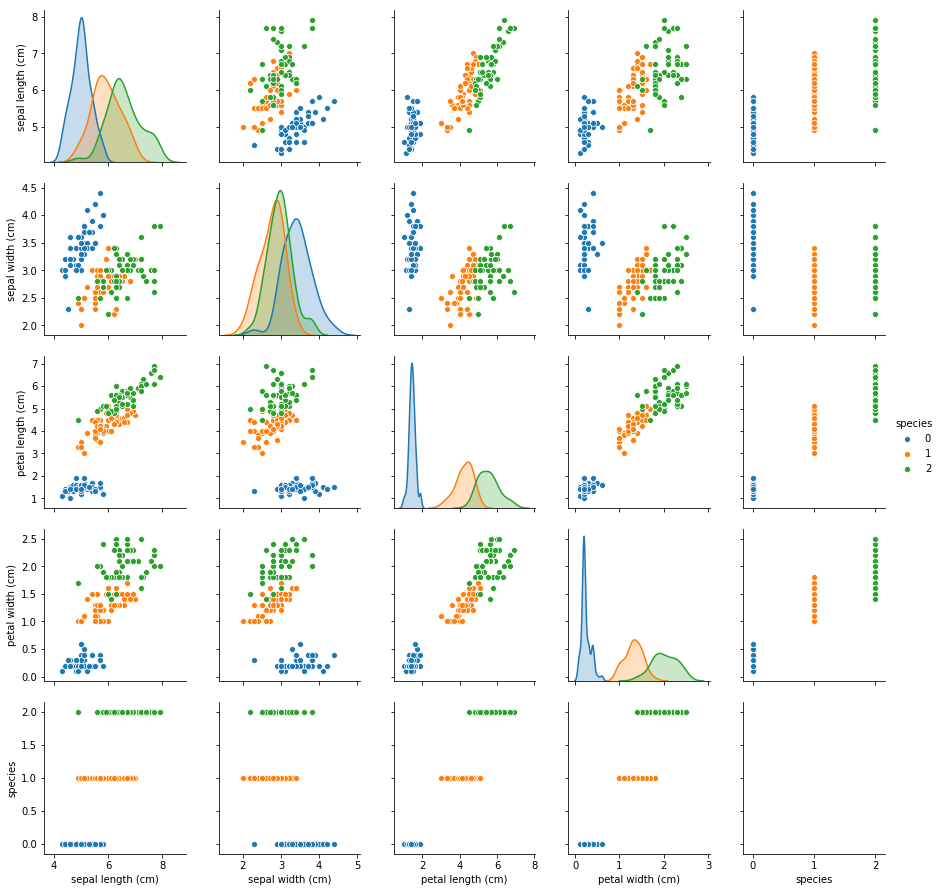

In [156]:
# ========== Part 2: loading in the Iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(data=iris['data'],columns=iris['feature_names'])
df['species'] = iris['target']

df['species'].value_counts() # 50 examples per class
df.isnull().mean() # no missing values

sns.pairplot(df,hue="species");

In [157]:
# ========== Part 3: Train_test_split & Feature Normalization
X = df.iloc[:,:4].values
y = df.iloc[:,4].values

# Splitting the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22)

# Feature Normalization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [158]:
# ========== Part 4: Model Specification and Training

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2',tol=0.0001,C=1.0,random_state=0,solver='lbfgs',max_iter=100,multi_class='multinomial')
log.fit(X_train_std,y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10,criterion= 'entropy', random_state=0)
forest.fit(X_train_std,y_train)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train_std,y_train)

from sklearn.neighbors import KNeighborsClassifier
knearest = KNeighborsClassifier(n_neighbors=5)
knearest.fit(X_train_std,y_train)

from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(X_train_std,y_train)

models = [log,forest,tree,knearest,SVC]

# Function to get the index numbers of the list of accuracies of our models
# so we can print them from best to worst in the output

def Get_List_of_Performance(X,y):
    max_accuracy = 0
    accuracies = []
    index = []

    for i in range(len(models)):
        accuracy = models[i].score(X,y)*100
        accuracies.append(accuracy)
        max_accuracy = max(accuracy,max_accuracy)
        # sort accuracies from low to high
        sorted_accuracies = sorted(accuracies)
        # sort them from high to low
        sorted_accuracies = sorted_accuracies[::-1]

    for i in range(len(accuracies)):
        index_nr  = accuracies.index(sorted_accuracies[i])
        index.append(accuracies.index(sorted_accuracies[i]))
        accuracies[index_nr] = 0
    return index

index = Get_List_of_Performance(X_train_std,y_train)

# Printing the Model performance on the Training Data from best to worst
print('A list of Model performances from best to worst on the Training Data\n\n')

for i in index:
    accuracy = models[i].score(X_train_std,y_train)*100
    b = models[i]
    model_spec = "\033[1m" + str(b) + "\033[0m"
    
    print(model_spec, '\n\nhad an accuracy on the Training data of:',"{:.2f}".format(accuracy), str("%"))
    print('------------------------------------------------------------------------------')   

A list of Model performances from best to worst on the Training Data


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False) 

had an accuracy on the Training data of: 100.00 %
------------------------------------------------------------------------------
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best') 

had an accuracy on the Training da

In [161]:
# ========== Part 5: running the Models on the testing data

index = Get_List_of_Performance(X_test_std,y_test)

# Printing the Model performance on the Training Data from best to worst
print('A list of Model performances from best to worst on the Testing Data\n\n')

for i in index:
    accuracy = models[i].score(X_test_std,y_test)*100
    b = models[i]
    model_spec = "\033[1m" + str(b) + "\033[0m"
    
    print(model_spec, '\n\nhad an accuracy on the Training data of:',"{:.2f}".format(accuracy), str("%"))
    print('------------------------------------------------------------------------------')

A list of Model performances from best to worst on the Testing Data


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) 

had an accuracy on the Training data of: 97.37 %
------------------------------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False) 

had an accuracy on the Training data of: 94.74 %
------------------------------------------------------------------------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform') 

had an accuracy o

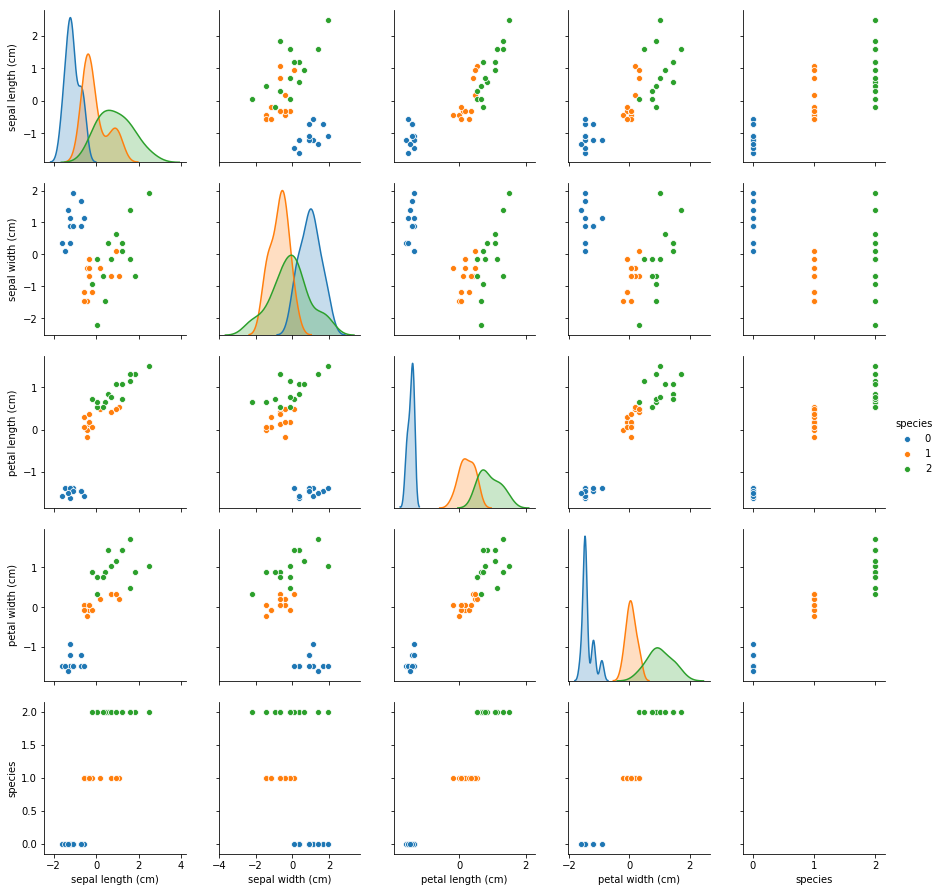

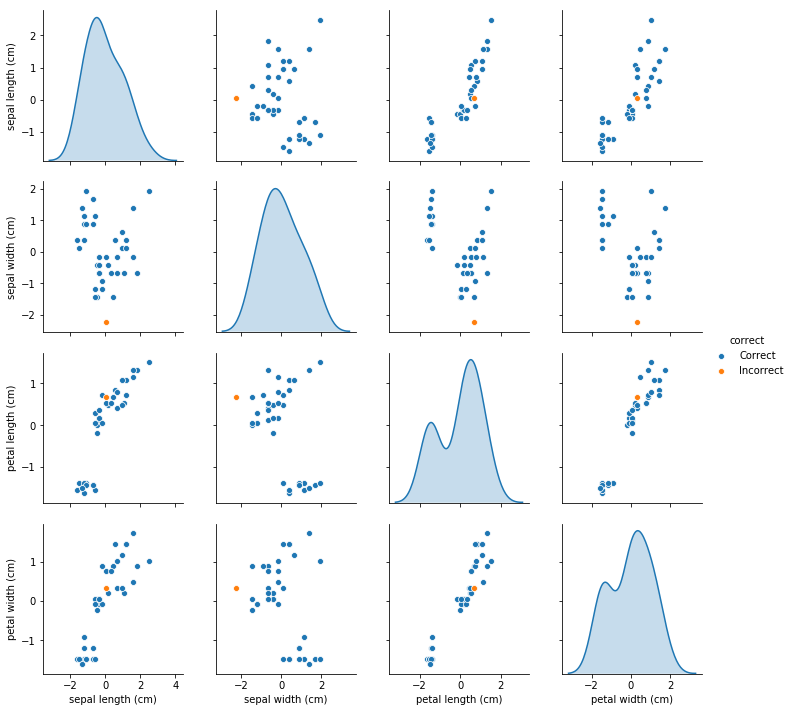

In [162]:
# ========== Part 6: Model Selection and visualizing predictions
# The best model on the testing data was the the Linear Support Vector Classifier (SVC)

import warnings
warnings.filterwarnings("ignore")

#predicting y-label for SVC Model
y_test_pred = SVC.predict(X_test_std)
correct = y_test_pred == y_test
df_test = pd.DataFrame(data=X_test_std,columns=iris['feature_names'])
df_test['species'] = y_test

# Plot of all the Test data and the true labels
sns.pairplot(df_test,hue="species");

df_test = pd.DataFrame(data=X_test_std,columns=iris['feature_names'])
df_test['correct'] = correct
df_test['correct'] = df_test['correct'].replace({True:'Correct',False:'Incorrect'})

# Plot of all the Test Data and the examples that were misclassified
sns.pairplot(df_test,hue="correct");
